
# Práctica 2: Metaheurísticas basadas en trayectorias: Tabu Search

<center><h3>
    Pedro López-Chaves Pérez
</h3></center>


# Instrucciones

Igual que en la Práctica 1, utilizaremos un **Jupyter Notebook** para la resolución de esta práctica.

Como ya sabéis, nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica. Aun así, a continuación tenéis unas breves instrucciones sobre como funciona:

* Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**
* Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
* Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Se te pedirán dos implementaciones del algoritmo de Búsqueda Tabú, una primera implementación obligatoria y una implementación mejorada optativa. Escribe el código de tu o tus soluciones en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_BusquedaTabu.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_BusquedaTabu.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_BusquedaTabu.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.
 
 ---


# Preliminares adicionales sobre Python

Además de lo visto en las prácticas anteriores, conviene familiarizarse con algunas funciones disponibles en Python que pueden resultarte útiles más adelante en la realización de esta práctica y en el uso del lenguaje en general.


Por ejemplo, cuando necesitas consultar documentación sobre paquetes Python, conviene que conozcas la versión que estás utilizando en tu entorno para poder encontrar las especificidades de cada *release*. Fíjate que en la sección *Docs by version* de la web https://docs.python.org/3/ puedes seleccionar los documentos de referencia de la versión.

Para averiguar la versión que está ejecutando este Jupyter Noteboook puedes emplear las siguientes líneas.

In [6]:
from platform import python_version

print(python_version())


3.9.7


Un paquete interesante puede ser statistics. Conociendo la versión, puedes puedes consultar la documentación y la lista completa de funciones disponibles: https://docs.python.org/3/library/statistics.html

A modo ilustrativo, puedes obtener estadísticos sobre series de datos de la siguiente forma.


In [7]:
import statistics

# ejemplo de obtención de medias y desviaciones típicas
listav = [1, 2, 3, 4, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)

listav = [1.0, 2.5, 3.75, 4.25, 5]
media = statistics.mean(listav)
desvtip = statistics.stdev(listav)
print(media, desvtip)


3 1.5811388300841898
3.3 1.5751984002023365


Otro paquete que puede resultarte útil a la hora de crear un informe o documentar tu práctica puede ser `matplotlib.pyplot`, que permite hacer gráficas de manera integrada en el propio Notebook. Puedes consultar sus capacidades en https://matplotlib.org/stable/gallery/index.html

Veámos un ejemplo ilustrativo.

<IPython.core.display.Javascript object>


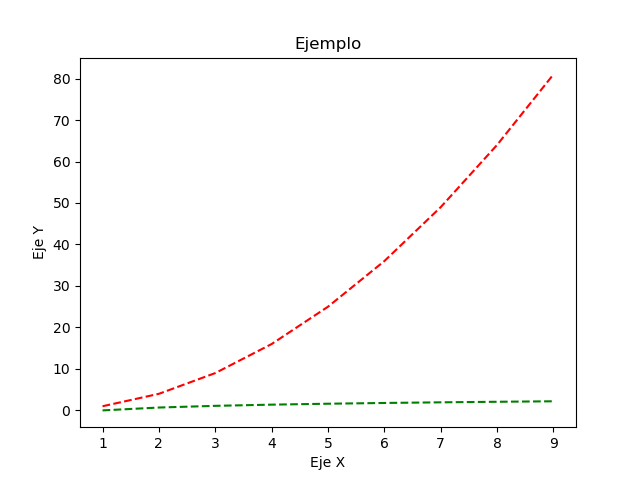

In [8]:
# Indicamos al Notebook que queremos figuras interactivas (esto sólo es necesario hacerlo una vez)
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos la librería (esto sólo es necesario hacerlo una vez)
import math

# definimos algunas líneas de tendencia arbitrarias
vectorx = [x for x in range (1,10)]
vectorlogy = [ math.log(i) for i in vectorx ]
vectorpowy = [ math.pow(i, 2) for i in vectorx ]

fig = plt.figure()  # Creamos una figura (contenedor para elementos a dibujar)
ax = fig.add_subplot(111, projection='rectilinear')  # añadimos subplot-canvas a la figura (contiene los elementos del dibujo)
 
# añadimos los plots
ax.plot(vectorx, vectorlogy, '--', color="green")
ax.plot(vectorx, vectorpowy, '--', color="red")
 
ax.set_title("Ejemplo")  # Ponemos un título
ax.set_xlabel("Eje X")  # Nombramos los ejes
ax.set_ylabel("Eje Y")
 
plt.show()  # Mostramos a figura por pantalla, que se corresponde con la fig creada arriba

---

# El Problema del Viajante de Comercio (VC) con Búsqueda Tabú

De nuevo, trataremos de resolver el problema del Viajante de Comercio, pero ahora con el algoritmo de Búsqueda Tabú.

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de Busquedá Tabú (TS, del inglés Tabu Search). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


## Definición del problema de Viajante de Comercio (VC)



El problema del viajante de comercio (VC) es el problema de la persona que quiere vender un producto, y que para ello quiere encontrar el viaje más corto posible a través de las ciudades de los clientes, haciendo una única visita a cada una, empezando y acabando el recorrido en su propia ciudad (recorrido circular desde la ciudad inicial).
Típicamente, el problema parte de una representación mediante un grafo ponderado $G=(N, A)$, donde $N$ es el conjunto de $n=|N|$ nodos (ciudades), y siendo A el conjunto de arcos conectando los nodos. Cada arco $(i, j) ∈ A$ tiene asignado un peso $d_ij$ que representa la distancia entre las ciudades $i$ y $j$.
El VC se reduce al problema de crear el circuito Hamiltoniano de longitud mínima sobre el grafo $G$. La solución a una instancia del problema del VC puede representarse como una permutación de los índices de las ciudades, donde lo importante es el orden de visita, que determinará el coste del viaje en términos de la distancia recorrida total. 
De este modo, el problema pertenece a la categoría de problemas NP, pues puede haber n permutaciones que se corresponden al espacio de búsqueda posible. Esto hace que resolver instancias de problemas con muchas ciudades (n grande) haga el problema impracticable con estrategias de búsqueda no-informadas y éste pueda beneficiarse de ciertas metaheurísticas, pudiendo abordar de problemas con tallas más grande a la vez que se obtienen soluciones razonablemente buenas.


### Nociones previas

Para facilitar vuestra labor de implementación, os proporcionamos la clase `Localizaciones`, que permite cargar las localizaciones GPS que representan los vértices del grafo G de N ciudades, y permite calcular de manera transparente la distancia entre cualquier par de ciudades usando la [fórmula del semiverseno]( https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno), que sirve para calcular las distancias teniendo en cuenta la curvatura de la Tierra. 
Es importante tener en cuenta que en la fórmula del semiverseno las coordenadas se expresan en radianes.


En primer lugar importa el módulo Python que acompaña esta práctica, que trae alguna función de apoyo implementada así como la clase de carga de datos.

In [9]:
from helpers_mod_sa import *

Inspecciona el código de carga de localizaciones mediante `psource(Localizaciones)`

In [10]:
psource (Localizaciones)

Fíjate que por defecto se carga el fichero `./data/grafo8cidades.txt`, que contiene las coordenadas GPS de 8 ciudades gallegas, siendo Santiago de Compostela la primera de ellas. La primera línea de estos ficheros indica el número de ciudades n, mientras que cada una de las líneas sucesivas especifican las coordenadas de cada ciudad, especificadas como coordenadas GPS (latitud y longitud en grados).

Puedes cargar otro fichero haciendo uso del parámetro `filename` como se muestra a continuación. Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km.

❗ Para esta práctica, **debéis utilizar** el fichero `./data/grafo100cidades.txt` que contiene las coordenadas de 100 concellos gallegos.

In [20]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))
g2=Localizaciones(filename='./data/grafos10_10/grafo_1.txt')
print (g2.distancia(0,1))
g3=Localizaciones(filename='./data/grafo100cidades.txt')
print(g3.distancia(0,1))

55.88273580792048
119.30959564041359
68.81748609463234



## P2.1: Implementación básica de Búsqueda Tabú (especificación obligatoria, 6pts)



En este apartado debes desarrollar una **versión básica del algoritmo de Búsqueda Tabú que resuelva el problema del viajante de comercio (TSP)** aplicado a los concellos de Galicia. La especificación del algoritmo será muy detallada, ya que el objetivo principal de esta primera parte es que dispongas de una implementación totalmente funcional y verificada que resuelva el problema correctamente.
Igual que en la práctica anterior (P1), consideramos que el recorrido es circular (empieza y termina en el mismo concello) y que tienen que pasar por N=100 concellos de Galicia. Implementa el algoritmo básico de Búsqueda Tabú para resolver el problema del VC enunciado arriba. Para ello, revisa la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las **siguientes consideraciones** de diseño para completar la implementación básica:
- **Representación  de  las  soluciones:**  representación  de  orden  (permutaciones)  **comenzando y finalizando en la ciudad 0**. Es decir, utilizamos una representación de orden formada por una secuencia de valores numéricos que representan cada uno de los concellos {0, 1, ..., 99}. Consideramos siempre como punto de partida y retorno el concello 0, por lo que efectivamente una solución *S* se representa como una permutación de los demás valores {1, ..., 99}. 


- **Solución inicial:** generación **totalmente aleatoria** de una permutación válida como está explicado en los apartados previos. 

❗  **NOTA: Es importante que la generación de la solución inicial se implemente en una función propia y que después, esta solución inicial se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**


- **Operador  de  generación de vecindario de una solución** (generación de la solución  siguiente  $S_{cand}$  a  partir  de  la  actual  $S_{act}$): Se utilizará el **operador  de  intercambio** y se generarán *todos los posibles intercambios**. Es decir, con este operador, se explota el vecindario de forma completa, con lo que se genera el siguiente número de vecinos:

$$ \sum_{i=1}^{L-1}i = \frac{L(L-1)}{2} $$

donde *L* es la longitud de la solución y se ha tenido en cuenta que es lo mismo intercambiar los vecinos *i, j* que *j, i*.

❗  **NOTA: Es importante que la generación del vecindario de una solución se implemente en una función propia y que después, el vecino seleccionado, se pase a la función que implementa el algoritmo de búsqueda tabú *per se*.**



- **Función de coste:** suma de las distancias del camino según el orden del recorrido teniendo en cuenta que se parte de y se llega al concello 0.  La distancia se calcula teniendo en cuenta los siguientes tres elementos:
    - Distancia desde el concello 0 al primer concello de la solución: 0 -> S[0]
    - Distancia recorrida en la solución: S[0] -> S[1] -> ... -> S[-1]
    - Distancia recorrida desde el concello final al concello 0: S[-1] ->0
    


- **Lista Tabú:** La lista tabú (LT) estará formada por los **movimientos de intercambio de índices** {i,j} que den lugar a las soluciones que forman la trayectoria de búsqueda. Tenéis que establecer **N=100** como parámetro de tenencia tabú, esto es, el tamaño de la lista tabú será de **N** elementos, de forma que un movimiento {i,j} saldrá de la lista tabú después de **N=100** operaciones y volverá a estar permitido.


- **Reinicialización:** En el caso de que transcurran **1000 iteraciones consecutivas** sin que mejore la solución óptima $S_{opt}$ alcanzada hasta el momento, se hará una reinicialización desde ella: $S_{opt}$. Se trata por tanto de una estrategia de reinicialización por **intensificación**. En el reinicio **no se restaura la lista tabú**, para dar opción a visitar vecinos no visitados anteriormente ya que determinados intercambios prohibidos al estar incluidos en la lista tabú. Es decir, cuando se hace un reinicio, se vuelve a la solución $S_{opt}$ y **se vacía la lista tabú.**


- **Criterio de parada:** Se finaliza la ejecución cuando se alcanzan **10.000 iteraciones** del algoritmo.



In [21]:
g1=Localizaciones(filename='./data/grafo100cidades.txt')

In [22]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))

55.88273580792048


In [23]:
import random
#funcion de generacion aleatoria de S0
def generar_S0(longitud_vector):
    vector = [x for x in range (1,longitud_vector)]
    random.shuffle(vector)
    return vector

#funcion coste del camino
def coste(camino):
    longitud_vector=len(camino)
    coste = g1.distancia(0,camino[0])
    coste += g1.distancia(camino[longitud_vector-1],0)
    for i in range(longitud_vector-1):
        coste += g1.distancia(camino[i],camino[i+1])
    return coste

In [24]:
from itertools import permutations

#funcion que obtiene todos los vecinos posibles del camino
def obtener_vecinos(vector):
    n = len(vector)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i,j])
    return vecinos

In [25]:
def tabu():
    lista_tabu=[]
    max_len=100
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    #Cact=coste(Sact) No lo calculamos ya que se inicializa a inf
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<4700):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste(Scand)<Cact):
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste(Scand)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor

In [26]:
g1=Localizaciones(filename='./data/grafo100cidades.txt')
sol=tabu()
print(sol)
print(coste(sol))

KeyboardInterrupt: 

In [27]:
g1=Localizaciones(filename='./data/grafo50cidadesA.txt')
start_time = time.time()
sol=tabu()
print("---- %s segundos ----" % (time.time() - start_time))
print(sol)
print(coste(sol))

4279
---- 101.79890823364258 segundos ----
[16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
1032.7605049585543


In [11]:
#coste para cuando ya hay vecinos
def coste_vecino(camino_viejo,camino_nuevo,coste,vecinos):
    vecinos_copia=[]
    camino_viejo = [0] + camino_viejo + [0]
    camino_nuevo = [0] + camino_nuevo + [0]
    vecinos_copia.append( vecinos[0] + 1 )
    vecinos_copia.append( vecinos[1] + 1 )
    for i in range(0,2):
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]-1],camino_viejo[vecinos_copia[i]])
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]],camino_viejo[vecinos_copia[i]+1])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]-1],camino_nuevo[vecinos_copia[i]])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]],camino_nuevo[vecinos_copia[i]+1])
    return coste

In [ ]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0(100)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<10000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

In [13]:
def tabu():
    lista_tabu=[]
    max_len=100
    #S0=generar_S0(100)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    S0=[25,30,42,6,49,40,16,28,36,14,7,13,17,23,46,12,11,21,15,43,19,47,10,1,44,3,2,24,4,37,31,34,8,29,48,35,9,38,45,32,39,22,20,33,26,41,5,27,18]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<10000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                print("El primer reinicio se hace en la iteración ", i+1)
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
        if(i == 2200):
            print("La lista tabu con 2200 iteraciones es ",lista_tabu)
            
    print(iteracion)
    return Smejor,iteracion

In [14]:
g1=Localizaciones(filename='./data/grafo50cidadesB.txt')
print("Inicio")
sol,it=tabu()
print(sol)
print(coste(sol))

Inicio
El primer reinicio se hace en la iteración  1314
La lista tabu con 2200 iteraciones es  [[2, 3], [3, 18], [6, 7], [43, 44], [45, 47], [45, 46], [20, 48], [22, 48], [19, 20], [27, 28], [12, 15], [15, 16], [12, 46], [11, 12], [14, 16], [15, 18], [3, 15], [3, 14], [2, 14], [3, 13], [4, 13], [3, 17], [5, 13], [4, 14], [17, 18], [3, 16], [1, 3], [1, 15], [1, 4], [2, 4], [24, 25], [30, 32], [31, 32], [30, 31], [31, 47], [21, 48], [22, 47], [22, 26], [22, 23], [26, 28], [26, 27], [21, 47], [36, 37], [33, 34], [20, 47], [19, 47], [23, 24], [28, 34], [32, 34], [28, 32], [42, 43], [42, 44], [23, 25], [13, 14], [19, 48], [16, 17], [19, 21], [20, 21], [40, 41], [47, 48], [18, 47], [13, 15], [13, 47], [13, 17], [13, 16], [14, 15], [18, 48], [3, 4], [1, 2], [0, 18], [0, 48], [1, 17], [4, 17], [2, 16], [4, 16], [31, 33], [9, 10], [2, 13], [46, 47], [11, 46], [11, 47], [12, 47], [1, 13], [1, 12], [12, 13], [2, 12], [29, 31], [1, 48], [11, 48], [29, 33], [0, 1], [2, 17], [1, 18], [8, 9], [8, 10]

In [97]:
g1=Localizaciones(filename='./data/grafo50cidadesA.txt')
print("hola")
start_time = time.time()
sol,it=tabu()
print("---- %s segundos ----" % (time.time() - start_time))
print(sol)
print(coste(sol))

hola
4280
---- 80.91171860694885 segundos ----
[16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
1032.7605049585543


In [99]:
g1=Localizaciones(filename='./data/grafo100cidades.txt')
print("hola")
start_time = time.time()
sol,it=tabu()
print("---- %s segundos ----" % (time.time() - start_time))
print(sol)
print(coste(sol))

hola
4633
---- 420.17189717292786 segundos ----
[59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
1663.1801510027733


Aqui generaremos la ejecucion del algoritmo 10 veces y recopilaremos los datos necesarios

EJECUCION 10 VECES DE TABU PARA 10 CIUDADES
3003
4645
4449
4035
3416
4168
5076
2088
3036
3435


COSTES POR EJECUCION


ValueError: x and y must be the same size

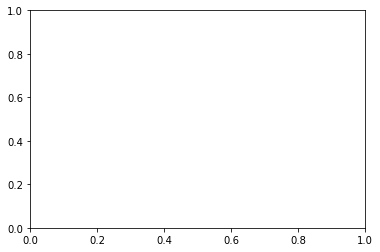

In [122]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 10 VECES DE TABU PARA 10 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(10):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(coste_soluciones))], coste_soluciones)
plt.show()
print("Media de coste_soluciones:", statistics.mean(coste_soluciones))
print("Desviación típica de coste_soluciones:", statistics.stdev(coste_soluciones))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))



COSTES POR EJECUCION


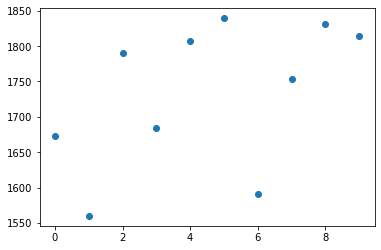

Media de coste_soluciones: 1734.3071693704737
Desviación típica de coste_soluciones: 101.39762998408433


In [131]:
costes=[]
for i in range(len(coste_soluciones)):
    coste(coste_soluciones[i])
    costes.append(coste(coste_soluciones[i]))
print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))



TIEMPOS POR EJECUCION


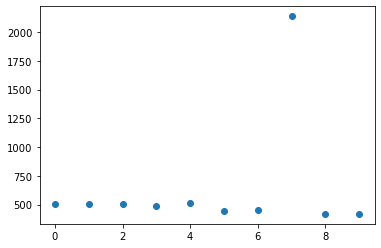

Media de tiempos: 639.10013256073
Desviación típica de tiempos: 528.0511148589088


In [128]:
print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))



ITERACION POR EJECUCION


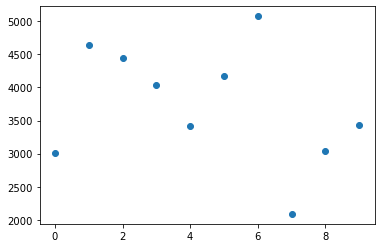

Media de iteraciones: 3735.1
Desviación típica de iteraciones: 903.2325220500471


In [129]:
print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

In [132]:
print(iteraciones)

[3003, 4645, 4449, 4035, 3416, 4168, 5076, 2088, 3036, 3435]


In [133]:
print(tiempos)

[507.8805525302887, 506.24060344696045, 506.0150046348572, 483.30233693122864, 516.9181048870087, 444.6311378479004, 450.561457157135, 2138.1637246608734, 418.3094277381897, 418.97897577285767]


### Preguntas sobre la especificación básica obligatoria (se responde al final del notebook)

❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

En esta primera parte, implementamos la version básica del algoritmo de busqueda tabú. Nuestro código se basa en una serie de funciones que explicaremos a continuacion.

La primera parte consta de la inicialización de los elementos propios del algoritmo. Sact, será la solución actual, es decir, la mejor de cada vecindario y Smejor será la solución mejor obtenida hasta el momento. S0 la generamos o con los ejemplos proporcionados para comprobar el correcto funcionamiento del algoritmo o generar una aleatoria.

Ahora se llega a los bucles, el primero es el numero de vecindarios que se visitarán sino se da la condicion de parada. El interior es el propio recorrido por todas las soluciones del vecindario.

Se hace una copia llamada aux, por cada vecindario, y es esta la que nos permetirá visitar todos los elementos del vecindario ya que siempre será el original con el que llegamos al vecindario.

Ahora nos adentramos a explicar nuestras funciones:

- generar_S0() es una funcion a la que le pasamos el numero de ciudades que habrá y nos genera un vector aleatorio de las ciudades, lo que sería una solucion valida para iniciar el algoritmo.

- coste() es una funcion que nos calcula el coste de una solucion desde 0

- coste_vecino() funcion que calcula el coste de una solucion a partir de la original (antes del cambio de indices), lo cual, disminuye mucho los cálculos a realizar y mejora los tiempos del algoritmo

- obtener_vecinos() funcion que devuelve todos los posibles vecinos de la solucion actual en forma de sus indices

❓ **Pregunta 2**. La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de la mejor solución obtenida.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

**Media y desviacion típica** de los costes son 1734.31 de media y 101.4 de desviación típica

**Los numeros de iteraciones** son: [3003, 4645, 4449, 4035, 3416, 4168, 5076, 2088, 3036, 3435]

**Tiempos de ejecución** fueron: [507.88, 506.24, 506.01, 483.30, 516.91, 444.63, 450.56, 2138.16, 418.30, 418.97]

Como conclusiones de esta parte sacamos que las soluciones obtenidas son satisfactorias, con buenos valores promedios, que solo una vez se obtiene la solución óptima por encima de las 5000 y es en un numero muy próximo, asi que recortaría el numero de iteraciones a 6000 o 5500; por último los tiempos de ejecucione son todos muy semejantes salvo uno, que se debió a una parada en la ejecución.

Se mejora mucho el algoritmo en tiempo con la funcion_vecinos y mostramos graficas donde observar todos los datos mencionados arriba.

 
## P2.2: Mejoras del algoritmo de Búsqueda Tabú (especificación opcional, 4pts)
En este apartado el objetivo es aplicar la resolución del problema que acabáis de programar a un nuevo conjunto de 120 localizaciones tomadas del archivo de [50.000 lugares históricos del Registro Nacional de los EE.UU](http://www.math.uwaterloo.ca/tsp/us/data.html), tal y como se describe en la web del [Traveller Salesman Problem (TSP)](http://www.math.uwaterloo.ca/tsp/) del [Department of Combinatorics and Optimization](https://uwaterloo.ca/combinatorics-and-optimization/) de la University of Waterloo CA [(Prof. William Cook)](http://www.math.uwaterloo.ca/~bico/).
Para evitar problemas de tiempo excesivo de cómputo, reduciremos el problema a 120 localizaciones que se indican en el fichero **US120.txt**.

**NOTA:** Si alguno de vosotros quiere realizar pruebas con todos los lugares indicados, puede obtener el fichero de texto original en el [siguiente enlace](http://www.math.uwaterloo.ca/tsp/us/files/us50000_latlong.txt).


En esta sección el objetivo es realizar mejoras al algoritmo desarrollado previamente, de acuerdo a lo visto en las clases expositivas. Podrá modificarse cualquier parámetro u operador, como por ejemplo:
- **Generación de la solución inicial** (inicialización greedy, ...)
- **Gestión de la lista tabú** con la inclusión de algún criterio de aspiración (por ejemplo excluir de la lista una solución si mejora a la mejor solución hasta el momento)
- El **operador de generación de vecinos** (por ejemplo no considerar todos los pares de índices, cambiar el operador de generación, ...)
- Utilizar **otras estrategias de reinicialización** por intensificación (por ejemplo reiniciar desde una solución aleatoria de un conjunto de las N mejores soluciones hasta ahora, restaurar la lista tabú, ...).
- Cambiar la **estrategia de reinicialización para dar diversificación** con una estrategia de **memoria a largo plazo**. Como puede ser utilizar una matriz simétriza *frec* que almacene elnúmero de veces que cada par de ciudades han sido consecutivas en las soluciones aceptadas hasta el momento. Con esta matriz de frecuencias se podría realizar una inicialización voraz sobre una matriz de distancias modificada que incluya las frecuencias almacenadas en memoria y penalice los pares de ciudads con mayor frecuencia, incrementando ficticiamente su distancia:

$$ D(i,j)_{MOD} = D(i,j) + \mu (D_{MAX} - D_{min}) \frac{frec(i,j)}{frec_{MAX}} $$

- Utilizar un criterio de **oscilación estratégica** que alterne entre las estrategias de intensificación y diversificación**-

In [175]:
import random

#funcion greedy que mejora S0 para partir de una soucion inicial mejor y disminuir el numero de iteraciones necesarias
def generar_S0_mejorada(tam):
    ciudad_inicial = random.randint(0, tam - 1)
    sol = [ciudad_inicial]
    for i in range(1, tam-1):
        mejor_ciudad = None
        mejor_coste = float('inf')
        for i in range(1, tam):
            if i in sol:
                continue
            coste = g1.distancia(len(sol)-1,i)
            if coste < mejor_coste:
                mejor_ciudad, mejor_coste = i, coste
        sol.append(mejor_ciudad)
    return sol

In [180]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0_mejorada(50)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<5000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

In [169]:
g1=Localizaciones(filename='./data/grafo50cidadesA.txt')
print("Inicio")
start_time = time.time()
sol,it=tabu()
print("---- %s segundos ----" % (time.time() - start_time))
print(sol)
print(coste(sol))

Inicio
4114
---- 86.02033019065857 segundos ----
[29, 8, 38, 27, 14, 36, 18, 46, 17, 32, 4, 22, 6, 33, 26, 11, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 10, 44, 30, 31, 1, 34, 13, 2, 7, 39, 20, 37, 23, 28, 21, 16, 24, 42, 3]
1082.8277423027532


EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
4484
4539
3037
4947
4964


ITERACION POR EJECUCION


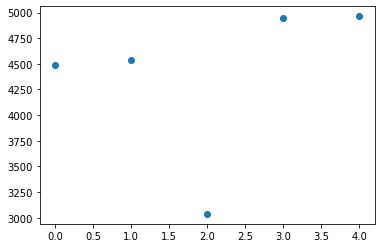

Media de iteraciones: 4394.2
Desviación típica de iteraciones: 790.7722175190528


In [174]:
print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
2534
4491
4201
2707
1221


ITERACION POR EJECUCION


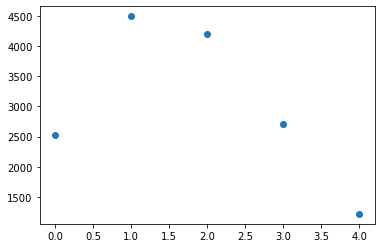

Media de iteraciones: 3030.8
Desviación típica de iteraciones: 1334.9704865651524


In [179]:
print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

g1=Localizaciones(filename='./data/grafo50cidadesA.txt')

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Se puede observar una gran mejoría en el numero de iteraciones necesarias, al pasar la media de 4400 a 3000. Por lo que nos damos por satisfechos. Ahora vamos a analizar los cambios con la aspiracion

In [201]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0_mejorada(50)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<5000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S in lista_tabu):
                if(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
                    #copiamos la candidata en la actual
                    Sact = Scand
                    Cact = coste_vecino(aux,Scand,coste_inicio,S)
                    #guardamos los ultimos vecinos con exitos
                    a=S[0]
                    b=S[1]
                    
            elif(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

Ejecutamos para ver los resultados en todos los aspecto del tabu sin la aspiracion:

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
4156
4650
1891
3513
1851


COSTES POR EJECUCION


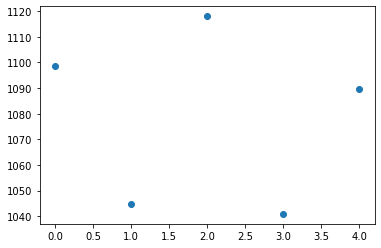

Media de coste_soluciones: 1078.359019476706
Desviación típica de coste_soluciones: 34.050456415377205


TIEMPOS POR EJECUCION


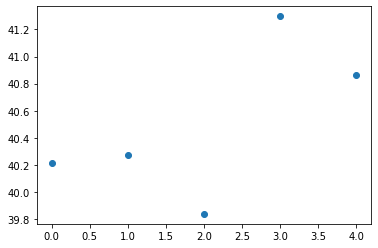

Media de tiempos: 40.49674816131592
Desviación típica de tiempos: 0.5790657556426331


ITERACION POR EJECUCION


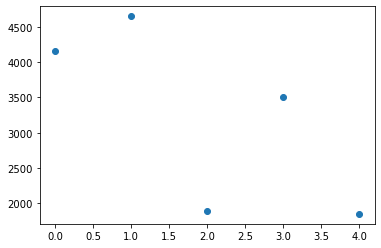

Media de iteraciones: 3212.2
Desviación típica de iteraciones: 1289.083278923437


In [183]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Ahora con la aspiracion:

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
50
46
47
5000
50


COSTES POR EJECUCION


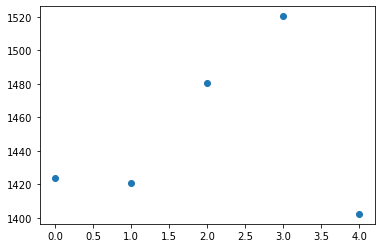

Media de coste_soluciones: 1449.584693955881
Desviación típica de coste_soluciones: 49.2100585014


TIEMPOS POR EJECUCION


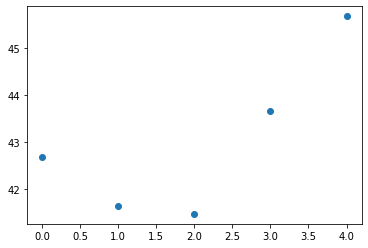

Media de tiempos: 43.025658798217776
Desviación típica de tiempos: 1.7211963110056652


ITERACION POR EJECUCION


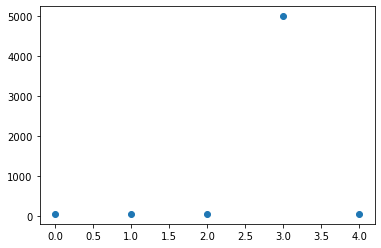

Media de iteraciones: 1038.6
Desviación típica de iteraciones: 2214.4906412084924


In [193]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Podemos observar como llega mucho antes, en iteraciones a la solucion, pero tambien como le cuesta mas luego encontrar una solucion óptima, si quisiesemos buenos resultados en un tiempo ínfimo sería buena opción, de lo contrario no. Como vemos esta solucion tan buena en la reduccion de iteraciones intentamos una variante que sea que 1 de cada 2 veces entre al dicidir i%2, a ver que solucion obtenemos:

In [194]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0_mejorada(50)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<5000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S in lista_tabu):
                if(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
                    if i%2==0:
                    
                        #copiamos la candidata en la actual
                        Sact = Scand
                        Cact = coste_vecino(aux,Scand,coste_inicio,S)
                        #guardamos los ultimos vecinos con exitos
                        a=S[0]
                        b=S[1]
                    
            elif(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
180
4999
4999
4981
4999


COSTES POR EJECUCION


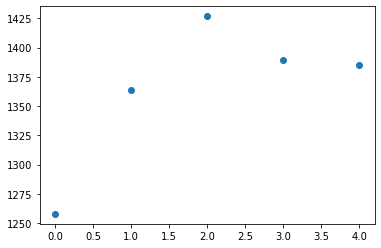

Media de coste_soluciones: 1364.610439692197
Desviación típica de coste_soluciones: 63.9133454482563


TIEMPOS POR EJECUCION


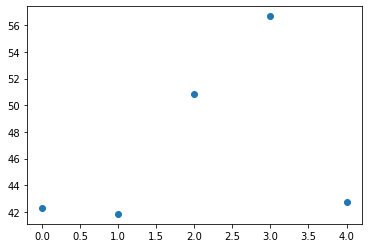

Media de tiempos: 46.88451476097107
Desviación típica de tiempos: 6.60238410721866


ITERACION POR EJECUCION


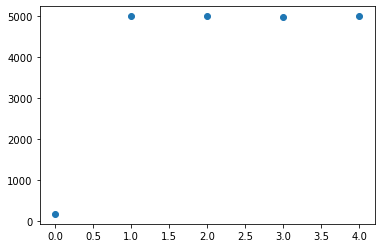

Media de iteraciones: 4031.6
Desviación típica de iteraciones: 2153.1239629895904


In [195]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Con la ejecucion de moneda al aire, observamos como mejoran, aunque poco los costes, pero perdemos la característica más positiva de la aspiracion que habiamos conseguido antes como son las pocas iteraciones. Ademas, seguuimos empeorando los costes y tiempos de antes. La aspiracion sin moneda al aire, sería óptima para casos que necesiten una respuesta inmediata al  poder ponerle un numero de iteraciones muy bajo, en los demas casos nos mantenemos como estabamos

Ahora vamos a intentar cambiar el criterio de seleccion de vecinos y probaremos varios:
- Como esta actualmente
- Solo coger los vecinos que sean los 2 indices pares

In [205]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0_mejorada(50)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<5000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
2795
2713
2351
1515
4565


COSTES POR EJECUCION


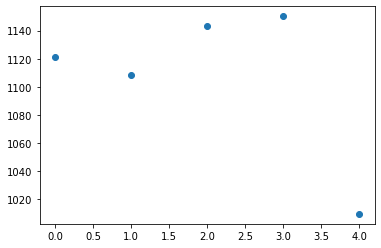

Media de coste_soluciones: 1106.587667069689
Desviación típica de coste_soluciones: 56.8934421400894


TIEMPOS POR EJECUCION


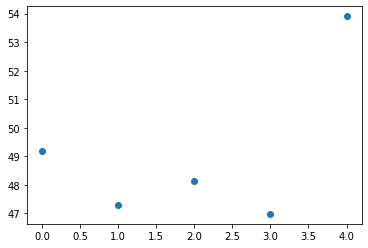

Media de tiempos: 49.10141367912293
Desviación típica de tiempos: 2.821156117665892


ITERACION POR EJECUCION


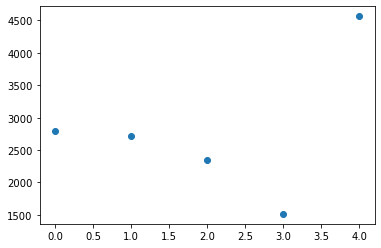

Media de iteraciones: 2787.8
Desviación típica de iteraciones: 1115.2242823755228


In [206]:
#resultados como antes, sin modificar
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

In [207]:
#funcion que genere los vecinos solo cuando ambos son pares
from itertools import permutations

def obtener_vecinos(vector):
    n = len(vector)
    indices_pares = [i for i in range(n) if i % 2 == 0]
    vecinos = []

    for perm in permutations(indices_pares, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i, j])
    return vecinos


EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
37
1156
1388
2029
2049


COSTES POR EJECUCION


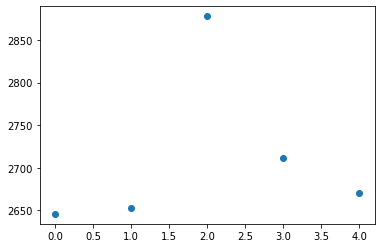

Media de coste_soluciones: 2711.585302653975
Desviación típica de coste_soluciones: 96.41400726133107


TIEMPOS POR EJECUCION


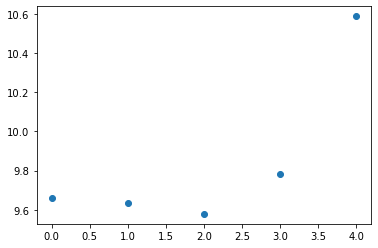

Media de tiempos: 9.848899793624877
Desviación típica de tiempos: 0.41930867409118533


ITERACION POR EJECUCION


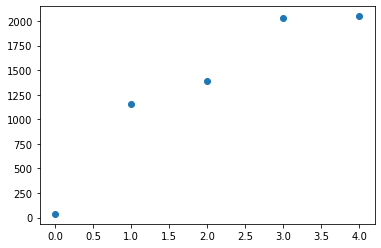

Media de iteraciones: 1331.8
Desviación típica de iteraciones: 823.2610157173725


In [208]:
#resultados con solo indices pares
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Observamos como la mejora en tiempos y iteraciones es brutal, por lo cual vamos a intentar otro generador de vecinos que nos lleve a visitar mas para intentar seguir con un buen tiempo y mejorar los resultados obtenidos en costes. Utilizaremos una funcion que visite 2 de cada 3 indices:

In [214]:
#funcion que genere los vecinos solo cuando ambos son pares
from itertools import permutations

def obtener_vecinos(vector):
    n = len(vector)
    indices_pares = [i for i in range(n)]
    vecinos = []

    for perm in permutations(indices_pares, 2):
        i, j = perm
        if i < j and j%3!=0:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i, j])
    return vecinos

EJECUCION 5 VECES DE TABU PARA 50 CIUDADES
4021
3014
3890
2860
1206


COSTES POR EJECUCION


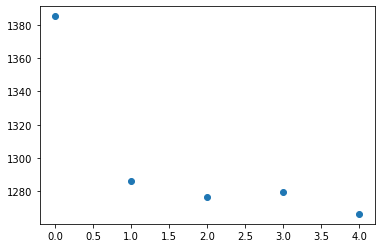

Media de coste_soluciones: 1298.768416757173
Desviación típica de coste_soluciones: 48.799178788581905


TIEMPOS POR EJECUCION


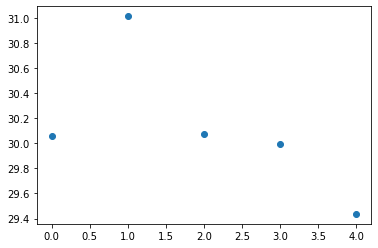

Media de tiempos: 30.115299701690674
Desviación típica de tiempos: 0.5668071219335294


ITERACION POR EJECUCION


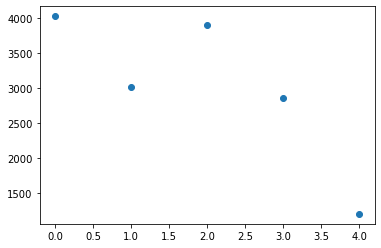

Media de iteraciones: 2998.2
Desviación típica de iteraciones: 1126.1390677886989


In [215]:
#resultados con solo indices pares
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 5 VECES DE TABU PARA 50 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(5):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

Sacamos como conclusion que mejoramos en tiempo como cabía esperar al reducir el espacio de búsqueda pero empeoramos las soluciones

Ahora vamos a intentar crear una memoria a largo plazo como se establece en el guion, empezamos con la funcion que genera la matriz

### Preguntas sobre la práctica optativa con las mejoras (se responde al final del notebook)

❓ **Pregunta 3**. ¿Qué intervenciones de mejora te ha llevado a mejores resultados? Explica brevemente las mejoras o intervenciones de mejora realizadas, cómo la has implementado, porqué las consideras buenas para el problema y presenta tus conclusiones acompañadas de los resultados obtenidos.


---

# Respuestas a las preguntas y evaluación

**Recordatorio:** No olvides escribir tu nombre y apellidos en la segunda celda de este documento.
La respuestas a las preguntas deben venir acompañadas de las implementaciones necesarias para su respuesta.

## P2.1 Especificación obligatoria (6pt)

La implementación básica se evaluará mediante un cuestionario automático de evaluación. Es también necesaria **realizar la implementación del algoritmo** y **responder a las preguntas 1 y 2** respectivamente. El cuestionario de evaluación lo realizarás en la primera sesión de la próxima práctica, y se centrará en la resolución por tu parte de diversas cuestiones prácticas relacionadas con la implementación realizada, pudiendo ser necesaria la ejecución, adaptación y modificación de la misma.

Aclaración: Independientemente del cuestionario automático de evaluación, siempre considera que las preguntas planteadas en el notebook deben ser respondidas también. Esas preguntas generales están diseñadas para formarte, y te servián para razonar y reflexionar sobre el tema, así como también para fomentar una discusión constructiva con los docentes en caso de dudas.


### **Pregunta 1** 

Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, etc.)

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*

<div class="alert alert-block alert-danger">
    <b>NOTA:</b> ¿Cómo me aseguro de que mi implementación es correcta?
    
Es importante que para poder comprobar la correcta implementación de tu solución, tu código tenga en cuenta los siguientes elementos:
-  Mantener en cada iteración la mejor solución encontrada hasta el momento y la iteración en la que se encontró
-  Que puedas imprimir los elementos que se encuentran en la lista tabú
-  Saber en qué iteraciones se llevaron a cabo los reinicios
</div>

<div class="alert alert-block alert-success">
<b>NOTA:</b>  Para verificar tu implementación, debes utilizar el fichero de localizaciones de los 100 concellos gallegos (grafo100cidades.txt). Puedes utilizar como prueba para verificar que la implementaición es correcta inicialmente, el fichero de localizaciones de 8 ciudades gallegas (grafo8cidades.txt). La solución óptima resuelta con una búsqueda informada como A* se situa en torno a los 382km para el problema de prueba con 8 ciudades.
</div>
    
<div class="alert alert-block alert-success">    
<b>AYUDA EXTRA</b>: Si quieres comprobar la implementación de tu práctica puedes probar a utilizar como solución inicial la solución siguiente (pasándosela directamente a la función que implementa el algoritmo de búsqueda tabú):
    
<b> Solución inicial: </b> 
- [77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [59, 69, 75, 53, 44, 10, 87, 12, 73, 38, 94, 41, 51, 15, 9, 99, 46, 32, 17, 92, 64, 37, 55, 23, 65, 79, 20, 4, 62, 86, 11, 63, 72, 26, 14, 48, 35, 60, 83, 70, 98, 47, 43, 58, 85, 19, 40, 5, 96, 68, 45, 25, 50, 89, 74, 27, 33, 97, 7, 84, 21, 16, 67, 66, 88, 29, 95, 8, 81, 31, 30, 49, 93, 61, 1, 78, 34, 13, 2, 80, 56, 82, 6, 22, 36, 71, 18, 91, 52, 90, 54, 57, 39, 28, 76, 24, 42, 77, 3]
- <b> Coste de la solución: </b> 1663.18
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4633
    
    
    
<b>Prueba adicional con el fichero de grafo50cidadesA.txt</b>:
    
<b> Solución inicial: </b> 
- [25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]

Como resultados, deberías obtener los siguientes:
- <b>Mejor solución:</b> [16, 21, 28, 23, 37, 39, 7, 2, 34, 13, 38, 27, 33, 6, 22, 20, 4, 32, 17, 46, 18, 36, 11, 26, 14, 9, 15, 41, 48, 25, 45, 35, 5, 40, 19, 47, 43, 12, 49, 1, 31, 30, 10, 44, 8, 29, 3, 42, 24]
- <b> Coste de la solución: </b> 1032.76
- <b>Iteración en la que se encuentra la mejor solución (empezando a contar en 1):</b> 4280
</div>


## Código

En esta primera parte, implementamos la version básica del algoritmo de busqueda tabú. Nuestro código se basa en una serie de funciones que explicaremos a continuacion.

La primera parte consta de la inicialización de los elementos propios del algoritmo. Sact, será la solución actual, es decir, la mejor de cada vecindario y Smejor será la solución mejor obtenida hasta el momento. S0 la generamos o con los ejemplos proporcionados para comprobar el correcto funcionamiento del algoritmo o generar una aleatoria.

Ahora se llega a los bucles, el primero es el numero de vecindarios que se visitarán sino se da la condicion de parada. El interior es el propio recorrido por todas las soluciones del vecindario.

Se hace una copia llamada aux, por cada vecindario, y es esta la que nos permetirá visitar todos los elementos del vecindario ya que siempre será el original con el que llegamos al vecindario.

Ahora nos adentramos a explicar nuestras funciones:

- generar_S0() es una funcion a la que le pasamos el numero de ciudades que habrá y nos genera un vector aleatorio de las ciudades, lo que sería una solucion valida para iniciar el algoritmo.

- coste() es una funcion que nos calcula el coste de una solucion desde 0

- coste_vecino() funcion que calcula el coste de una solucion a partir de la original (antes del cambio de indices), lo cual, disminuye mucho los cálculos a realizar y mejora los tiempos del algoritmo

- obtener_vecinos() funcion que devuelve todos los posibles vecinos de la solucion actual en forma de sus indices

In [134]:
from itertools import permutations

import random
# funcion de generacion de solucion inicial
def generar_S0(longitud_vector):
    vector = [x for x in range (1,longitud_vector)]
    random.shuffle(vector)
    return vector

#funcion que obtiene todos los vecinos posibles del camino
def obtener_vecinos(vector):
    n = len(vector)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i,j])
    return vecinos

#funcion coste del camino
def coste(camino):
    longitud_vector=len(camino)
    coste = g1.distancia(0,camino[0])
    coste += g1.distancia(camino[longitud_vector-1],0)
    for i in range(longitud_vector-1):
        coste += g1.distancia(camino[i],camino[i+1])
    return coste

#coste para cuando ya hay vecinos
def coste_vecino(camino_viejo,camino_nuevo,coste,vecinos):
    vecinos_copia=[]
    camino_viejo = [0] + camino_viejo + [0]
    camino_nuevo = [0] + camino_nuevo + [0]
    vecinos_copia.append( vecinos[0] + 1 )
    vecinos_copia.append( vecinos[1] + 1 )
    for i in range(0,2):
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]-1],camino_viejo[vecinos_copia[i]])
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]],camino_viejo[vecinos_copia[i]+1])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]-1],camino_nuevo[vecinos_copia[i]])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]],camino_nuevo[vecinos_copia[i]+1])
    return coste
    
# funcion que implementa el algoritmo búsqueda tabú
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0(100)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<10000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

###  **Pregunta 2**

La parte experimental de la práctica consiste en realizar **10 ejecuciones diferentes** de la implementación realizada y reportar:
- **Media y desviación** estándar de las soluciones obtenidas.
- El **número de iteración** en el que se obtuvo la mejor solución (por lo que debéis mantener además de la solución óptima hasta el momento $S_{opt}$, la iteración en la que se obtiene). 
- El **tiempo de ejecución** del algoritmo (en las nociones previas se explica cómo hacer esto).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir.*


In [ ]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 10 VECES DE TABU PARA 10 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

for i in range(10):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))



COSTES POR EJECUCION


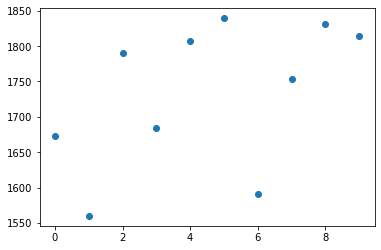

Media de coste_soluciones: 1734.3071693704737
Desviación típica de coste_soluciones: 101.39762998408433


In [135]:
costes=[]
for i in range(len(coste_soluciones)):
    coste(coste_soluciones[i])
    costes.append(coste(coste_soluciones[i]))
print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))



TIEMPOS POR EJECUCION


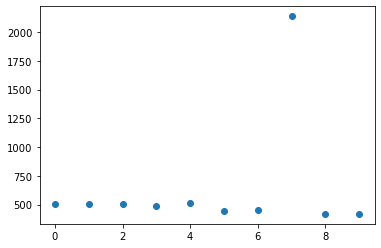

Media de tiempos: 639.10013256073
Desviación típica de tiempos: 528.0511148589088


In [136]:
print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

Vemos que hay un valor atípico que se debe a un fallo de ejecución, asi que lo eliminamos:



TIEMPOS POR EJECUCION


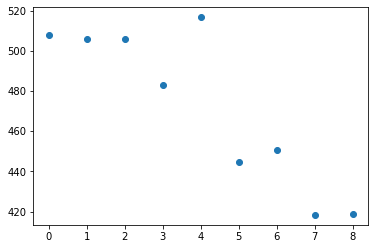

Media de tiempos: 472.5375112162696
Desviación típica de tiempos: 39.78411195314158


In [138]:
t=tiempos.copy()
t[7]=t[8]
t[8]=t[9]
t.pop()
print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(t))], t)
plt.show()
print("Media de tiempos:", statistics.mean(t))
print("Desviación típica de tiempos:", statistics.stdev(t))

**Media y desviacion típica** de los costes son 1734.31 de media y 101.4 de desviación típica

**Los numeros de iteraciones** son: [3003, 4645, 4449, 4035, 3416, 4168, 5076, 2088, 3036, 3435]

**Tiempos de ejecución** fueron: [507.88, 506.24, 506.01, 483.30, 516.91, 444.63, 450.56, 2138.16, 418.30, 418.97]

Como conclusiones de esta parte sacamos que las soluciones obtenidas son satisfactorias, con buenos valores promedios, que solo una vez se obtiene la solución óptima por encima de las 5000 y es en un numero muy próximo, asi que recortaría el numero de iteraciones a 6000 o 5500; por último los tiempos de ejecucione son todos muy semejantes salvo uno, que se debió a una parada en la ejecución.

Se mejora mucho el algoritmo en tiempo con la funcion_vecinos y mostramos graficas donde observar todos los datos mencionados arriba.

❗  **NOTA: sé conservador en tu estrategia para verificar tu implementación**, especialmente cuando empleas ficheros de datos grandes como el del problema de las 100 ciudades. Si dejas ejecutando tu algoritmo por un número elevado de iteraciones, puede resultarte útil medir el tiempo que tarda para tomar decisiones sobre donde establecer el límite. 

## P2.2 Implementación de las mejoras (4 pt)

### **Pregunta 3** 

¿Qué intervenciones de mejora te ha llevado a mejores resultados? Prepara un informe en el que explices brevemente las mejoras o intervenciones de mejora realizadas, cómo las has implementado, y diseña un laboratorio para obtener resultados que te permitan explicar porqué las consideras buenas para el problema y soportar tus conclusiones acompañadas de los resultados obtenidos. (MAX. aprox. 1200 palabras)

Aclaraciones: La evaluación de esta parte se llevará a cabo en términos de la completitud y correctitud del laboratorio implementado, así como de la calidad del propio informe, que debe ser conciso y preciso, pudiendo acompañarse de gráficas y tablas que faciliten y fundamenten la explicación e argumentación. Es muy importante explicar de manera clara, precisa y fundamentada. Se valorará más positivamente las intervenciones de mejora que tengan mayor dificultad de implementación que las triviales. Se reservará hasta un punto que se asignará en términos de la calidad de la mejor solución obtenida entre el conjunto de las prácticas entregadas (es por ello que no debes olvidar marcar en tu informe muy claramente cuál ha sido tu mejor solución y con qué configuración/versión).

*Incluye todas las celdas que consideres oportunas para que sea legible y fácil de seguir*

**RESPUESTA**

Para las pruebas de este informe, se decidió conscientemente utilizar 5000 iteraciones y las 50 ciudades en lugar de 120, al estar utilizando una máquina muy lenta y que daba largos tiempos de ejecución. La razón es esa y no la falta de atención o equivocación.

La primera mejora que investigamos es la de mejorar la generacion de S0 a partir de una funcion greedy. La funcion que implementamos lo que hace es, primero, iniciar la solucion en una ciudad al azar; y a partir de ahi, buscamos la ciudad a menos distancia de la anterior. Obtenemos de esta manera una solución con un coste mucho mejor para empzar, lo que se traduce en menos iteraciones para alcanzar las soluciones óptimas. La funcion es la siguiente:

In [217]:
#funcion greedy que mejora S0 para partir de una soucion inicial mejor y disminuir el numero de iteraciones necesarias
def generar_S0_mejorada(tam):
    ciudad_inicial = random.randint(0, tam - 1)
    sol = [ciudad_inicial]
    for i in range(1, tam-1):
        mejor_ciudad = None
        mejor_coste = float('inf')
        for i in range(1, tam):
            if i in sol:
                continue
            coste = g1.distancia(len(sol)-1,i)
            if coste < mejor_coste:
                mejor_ciudad, mejor_coste = i, coste
        sol.append(mejor_ciudad)
    return sol

A continuación, entramos en las mejoras que buscan reducir el espacio de búsqueda, intentando no perder calidad en nuestras soluciones. Empezamos con la optimización de la Gestión de la lista tabú con la inclusión de algún criterio de aspiración. El criterio que seleccionamos es que si un par de indices se encuentran en la lista tabú, pero esta combinación mejora la obtenida hasta el momento, pues la permitimos. La funcion tabu quedo de la sigueinte manera:

In [218]:
if (S in lista_tabu):
    if(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
        #copiamos la candidata en la actual
        Sact = Scand
        Cact = coste_vecino(aux,Scand,coste_inicio,S)
        #guardamos los ultimos vecinos con exitos
        a=S[0]
        b=S[1]

elif(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
    #copiamos la candidata en la actual
    Sact = Scand
    Cact = coste_vecino(aux,Scand,coste_inicio,S)
    #guardamos los ultimos vecinos con exitos
    a=S[0]
    b=S[1]

Como la solucion ofreció los resultados, aunque peores en costes, los consiguió en muy pocas iteraciones. Esto quiere decir que si estuviesemos buscando que el algoritmo fuese extremadamente rápido pudiendo prescindir en cierto modo de la calidad de las soluciones sería una opción ideal. Hicimos una segunda implementacion de la aspiración buscando un mayor equilibrio entre el numero de iteraciones necesarios (empeorarlo) y la calidad de las soluciones (mejorarlas). Para ello echamos una moneda al aire cada vez que se de la casuistica de antes de permitir entrar un vecino que estaría prohibido por nuestra tabla tabu:

In [220]:
if (S in lista_tabu):
    if(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
        if i%2==0:

            #copiamos la candidata en la actual
            Sact = Scand
            Cact = coste_vecino(aux,Scand,coste_inicio,S)
            #guardamos los ultimos vecinos con exitos
            a=S[0]
            b=S[1]

elif(coste_vecino(aux,Scand,coste_inicio,S)<Cact):
    #copiamos la candidata en la actual
    Sact = Scand
    Cact = coste_vecino(aux,Scand,coste_inicio,S)
    #guardamos los ultimos vecinos con exitos
    a=S[0]
    b=S[1]

Con la ejecucion de moneda al aire, observamos como mejoran, aunque poco los costes, pero perdemos la característica más positiva de la aspiracion que habiamos conseguido antes como son las pocas iteraciones.

Ahora vamos a intentar cambiar el criterio de seleccion de vecinos y probaremos varios:
- Como esta actualmente
- Solo coger los vecinos que sean los 2 indices pares
- Coger 2 de cada 3 pares de indices

In [221]:
#funcion que genera solo pares donde ambos indices son pares
def obtener_vecinos(vector):
    n = len(vector)
    indices_pares = [i for i in range(n) if i % 2 == 0]
    vecinos = []

    for perm in permutations(indices_pares, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i, j])
    return vecinos

Observamos como la mejora en tiempos y iteraciones es brutal, por lo cual vamos a intentar otro generador de vecinos que nos lleve a visitar mas para intentar seguir con un buen tiempo y mejorar los resultados obtenidos en costes.

In [ ]:
#funcion que genera 2 de cada 3 pares de soluciones
def obtener_vecinos(vector):
    n = len(vector)
    indices_pares = [i for i in range(n)]
    vecinos = []

    for perm in permutations(indices_pares, 2):
        i, j = perm
        if i < j and j%3!=0:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i, j])
    return vecinos

Finalmente, seguimos mejorando en tiempo e iteraciones pero empeoramos en las soluciones.

Como conclusion, las mejoras como la de generar S0, al llevar más trabajo son capaces de mejorar las ejeuciones. Al ser un trabajo que solo se hace una vez por cada ejecució, el aumento de tiempo no es considerable pero sus resultados si por lo que las implementamos.

Por otro lado, están las otras mejoras realizada que se dedicaban a reducir el espacio de busqueda mejorando el rendimiento. Observamos como efectivamente esto era así.

La mejor solucion obtenida en costes es la de greedy y las otras mejoran el rendimiento pero no la calidad de las soluciones.

**MEJOR SOLUCION OBTENIDA**

In [28]:
#funcion greedy que mejora S0 para partir de una soucion inicial mejor y disminuir el numero de iteraciones necesarias
def generar_S0_mejorada(tam):
    ciudad_inicial = random.randint(0, tam - 1)
    sol = [ciudad_inicial]
    for i in range(1, tam-1):
        mejor_ciudad = None
        mejor_coste = float('inf')
        for i in range(1, tam):
            if i in sol:
                continue
            coste = g1.distancia(len(sol)-1,i)
            if coste < mejor_coste:
                mejor_ciudad, mejor_coste = i, coste
        sol.append(mejor_ciudad)
    return sol

In [29]:
#funcion coste del camino
def coste(camino):
    longitud_vector=len(camino)
    coste = g1.distancia(0,camino[0])
    coste += g1.distancia(camino[longitud_vector-1],0)
    for i in range(longitud_vector-1):
        coste += g1.distancia(camino[i],camino[i+1])
    return coste

#coste para cuando ya hay vecinos
def coste_vecino(camino_viejo,camino_nuevo,coste,vecinos):
    vecinos_copia=[]
    camino_viejo = [0] + camino_viejo + [0]
    camino_nuevo = [0] + camino_nuevo + [0]
    vecinos_copia.append( vecinos[0] + 1 )
    vecinos_copia.append( vecinos[1] + 1 )
    for i in range(0,2):
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]-1],camino_viejo[vecinos_copia[i]])
        coste -= g1.distancia(camino_viejo[vecinos_copia[i]],camino_viejo[vecinos_copia[i]+1])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]-1],camino_nuevo[vecinos_copia[i]])
        coste += g1.distancia(camino_nuevo[vecinos_copia[i]],camino_nuevo[vecinos_copia[i]+1])
    return coste

In [30]:
#funcion que obtiene todos los vecinos posibles del camino
def obtener_vecinos(vector):
    n = len(vector)
    indices = list(range(n))
    vecinos = []

    for perm in permutations(indices, 2):
        i, j = perm
        if i < j:  # Asegurarse de que siempre i < j para evitar duplicados
            vecinos.append([i,j])
    return vecinos

In [31]:
def tabu():
    lista_tabu=[]
    max_len=100
    S0=generar_S0_mejorada(120)
    #S0=[77, 9, 43, 73, 2, 53, 12, 83, 92, 33, 50, 63, 54, 59, 64, 74, 55, 14, 35, 5, 58, 87, 37, 7, 69, 79, 89, 21, 23, 80, 20, 56, 75, 68, 27, 95, 78, 25, 88, 51, 47, 91, 49, 60, 13, 36, 70, 42, 11, 22, 40, 72, 28, 97, 19, 71, 29, 90, 85, 76, 16, 24, 81, 84, 34, 8, 31, 38, 67, 45, 44, 32, 96, 10, 61, 94, 17, 18, 93, 30, 52, 66, 99, 26, 46, 39, 15, 86, 41, 4, 62, 1, 48, 82, 57, 98, 3, 65, 6]
    #S0=[25, 6, 43, 23, 13, 47, 4, 11, 46, 41, 15, 38, 21, 26, 14, 42, 49, 32, 33, 3, 12, 20, 8, 48, 39, 28, 37, 45, 36, 2, 17, 9, 31, 29, 7, 24, 1, 5, 18, 35, 44, 22, 16, 30, 34, 10, 40, 19, 27]
    #creamos las copias
    Smejor=S0.copy()
    Sact=S0.copy()
    
    #calculamos los costes
    Cmej=coste(Smejor)
    
    i=0#contador para la parada
    k=0#contador para reinicio
    
    while(i<10000):#bucle que controla el numero de iteraciones
        
        vecinos=obtener_vecinos(Sact)
        Cact=float('inf')
        aux= Sact.copy()
        coste_inicio = coste(aux)
        
        for S in vecinos:#recorremos todos los vecinos

            Scand=aux.copy()
            Scand[S[0]], Scand[S[1]] = Scand[S[1]], Scand[S[0]]
            
            if (S not in lista_tabu and coste_vecino(aux,Scand,coste_inicio,S)<Cact) :
                #copiamos la candidata en la actual
                Sact = Scand
                Cact = coste_vecino(aux,Scand,coste_inicio,S)
                #guardamos los ultimos vecinos con exitos
                a=S[0]
                b=S[1]
                
        
        if (Cact==float('inf')):#ninguno que no estuviera en la lista
            break
            
        if (Cact<coste(Smejor)):#la sol actual mejora la que teniamos
            Smejor = Sact.copy()
            iteracion=i+1#guardamos la iteración del ultimo éxito
            k=0 #se reinicia k
        else:
            k+=1
            if(k==1000):
                lista_tabu.clear()
                k=0
                Sact=Smejor.copy()
                Cact=coste(Smejor)
                
        #añadimos los indices a la lista
        lista_tabu.append([a,b])
        
        #si la lista es demasiado grande
        if len(lista_tabu)>max_len:
            lista_tabu.pop(0)
            
        i+=1 #aumentamos el contador
            
    print(iteracion)
    return Smejor,iteracion

EJECUCION 10 VECES DE TABU PARA 10 CIUDADES
4066


COSTES POR EJECUCION


<IPython.core.display.Javascript object>


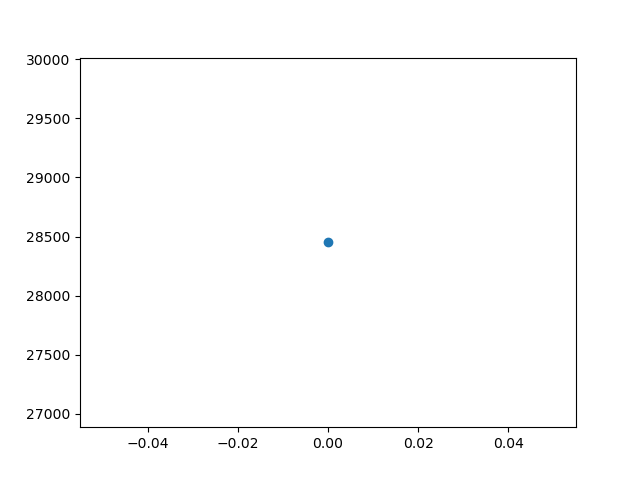

Media de coste_soluciones: 28450.42189976567


StatisticsError: variance requires at least two data points

In [33]:
import time
import statistics
import matplotlib.pyplot as plt

print("EJECUCION 10 VECES DE TABU PARA 10 CIUDADES")

tiempos = []
coste_soluciones = []
iteraciones = []

g1=Localizaciones(filename='./data/US120.txt')

for i in range(1):
    start_time = time.time()
    sol, iteracion = tabu()
    tiempos.append(time.time() - start_time)
    coste_soluciones.append(sol)
    iteraciones.append(iteracion)

costes=[]
for i in range(len(coste_soluciones)):
    costes.append(coste(coste_soluciones[i]))

print("\n\nCOSTES POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(costes))], costes)
plt.show()
print("Media de coste_soluciones:", statistics.mean(costes))
print("Desviación típica de coste_soluciones:", statistics.stdev(costes))

print("\n\nTIEMPOS POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(tiempos))], tiempos)
plt.show()
print("Media de tiempos:", statistics.mean(tiempos))
print("Desviación típica de tiempos:", statistics.stdev(tiempos))

print("\n\nITERACION POR EJECUCION")
fig, ax = plt.subplots()
ax.scatter([x for x in range (0,len(iteraciones))], iteraciones)
plt.show()
print("Media de iteraciones:", statistics.mean(iteraciones))
print("Desviación típica de iteraciones:", statistics.stdev(iteraciones))

In [34]:
print(tiempos)

[728.7153253555298]


No llegamos a ejecutarla por falta de tiempo